In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline
from sklearn.externals import joblib
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
df=pd.read_csv('/content/Train.csv')
df_t=pd.read_csv('/content/Test.csv')

In [4]:
df.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [5]:
print('Train_shape :',df.shape)
print('Test_shape :',df_t.shape)

Train_shape : (18208, 12)
Test_shape : (12140, 11)


In [6]:
df.describe()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
count,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,1.820800e+04,18208.000000
mean,0.544283,0.483585,5.155536,-12.198086,0.648506,0.477702,0.322109,0.164888,0.421440,115.305776,2.180101e+05,3.850231
std,0.202709,0.302010,3.535068,8.370566,0.477450,0.380634,0.413493,0.136531,0.271922,31.478303,9.648289e+04,0.544226
min,0.000000,0.000216,0.000000,-47.576000,0.000000,0.000000,0.000000,0.011900,0.000000,0.000000,3.184400e+04,0.000000
25%,0.411000,0.200000,2.000000,-16.496250,0.000000,0.086175,0.000001,0.095300,0.184750,90.974250,1.696202e+05,4.000000
50%,0.573000,0.517000,5.000000,-9.166500,1.000000,0.430000,0.002245,0.112000,0.393000,114.022500,2.046460e+05,4.000000
75%,0.699000,0.742000,8.000000,-5.943750,1.000000,0.895000,0.859000,0.176000,0.640000,134.997000,2.471562e+05,4.000000
max,0.998000,1.000000,11.000000,-0.079000,1.000000,0.996000,1.000000,0.991000,0.999000,219.701000,3.908467e+06,5.000000


[]

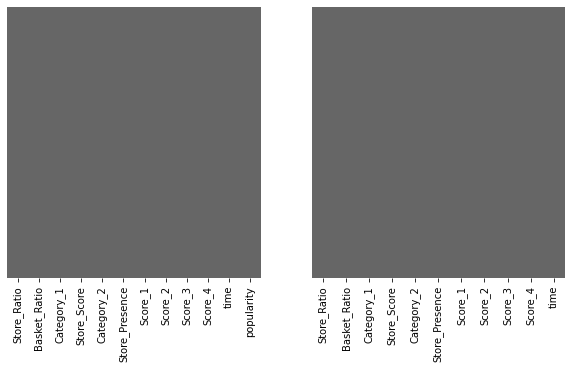

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='Dark2_r')
plt.subplot(1,2,2)
sns.heatmap(df_t.isnull(),cbar=False,yticklabels=False,cmap='Dark2_r')
plt.plot()

In [8]:
df['popularity'].value_counts()

4    15231
3     2166
5      472
1      323
0       16
Name: popularity, dtype: int64

In [9]:
df.groupby('popularity').mean()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
popularity,,,,,,,,,,,
0,0.000000,0.108492,3.250000,-21.696063,0.687500,0.651644,0.883687,0.297850,0.000000,0.000000,134590.562500
1,0.349232,0.265482,5.275542,-19.388551,0.712074,0.751829,0.602992,0.182527,0.212988,105.858985,205178.888545
3,0.387103,0.263499,5.037396,-18.269269,0.696214,0.749082,0.551120,0.151671,0.262560,115.243403,217076.252078
4,0.577680,0.527163,5.180422,-10.927266,0.640076,0.424664,0.274224,0.166299,0.455254,115.836056,218536.223689
5,0.339804,0.249283,4.877119,-20.103159,0.656780,0.750338,0.605115,0.163453,0.216313,108.853684,216928.105932


In [10]:
df.groupby('popularity').describe()

Store_Ratio                      ...      time                     
                 count      mean       std  ...       50%       75%        max
popularity                                  ...                               
0                 16.0  0.000000  0.000000  ...  129250.0  153832.0   189600.0
1                323.0  0.349232  0.189701  ...  191907.0  230052.0   730640.0
3               2166.0  0.387103  0.190404  ...  197880.0  248780.0  1804691.0
4              15231.0  0.577680  0.187102  ...  205792.0  247427.0  3908467.0
5                472.0  0.339804  0.193539  ...  196000.0  239790.0  1606164.0

[5 rows x 88 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


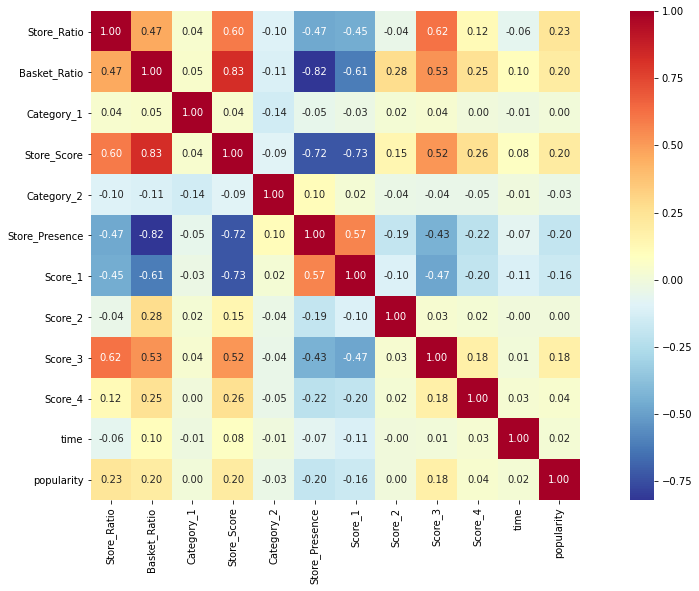

In [12]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},cmap='RdYlBu_r')

Store_Ratio


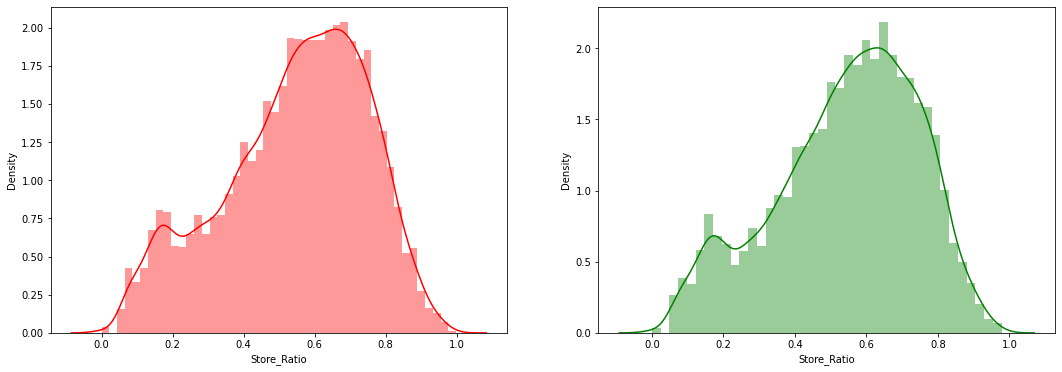

Basket_Ratio


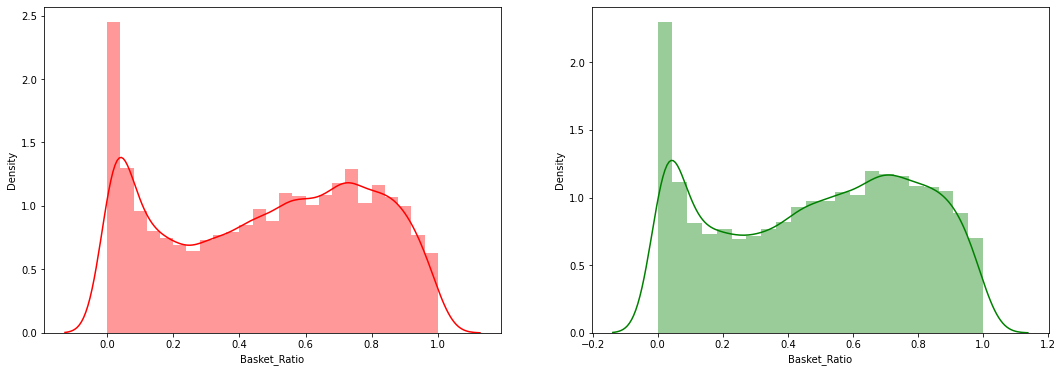

Category_1


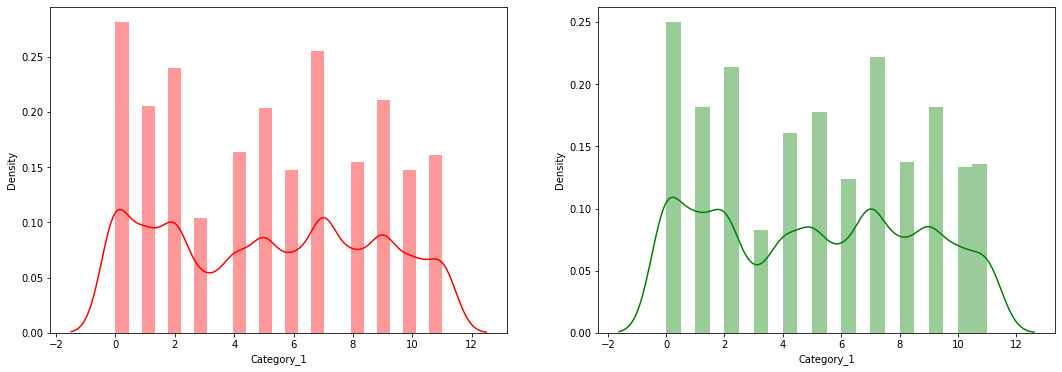

Store_Score


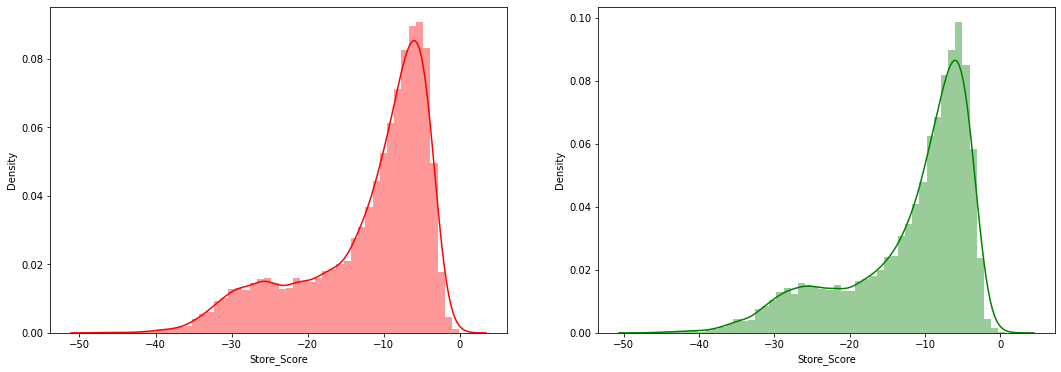

Category_2


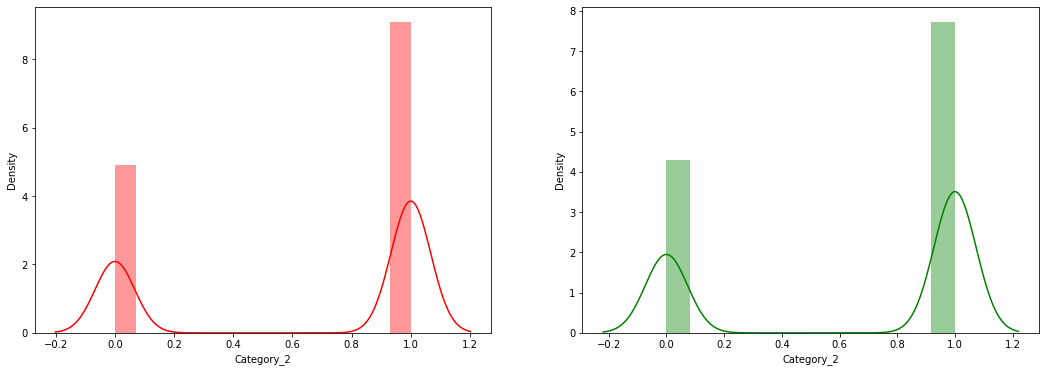

Store_Presence


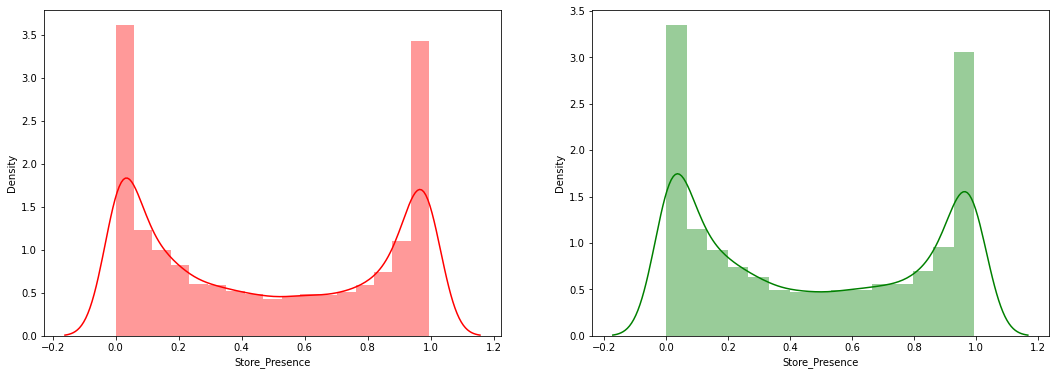

Score_1


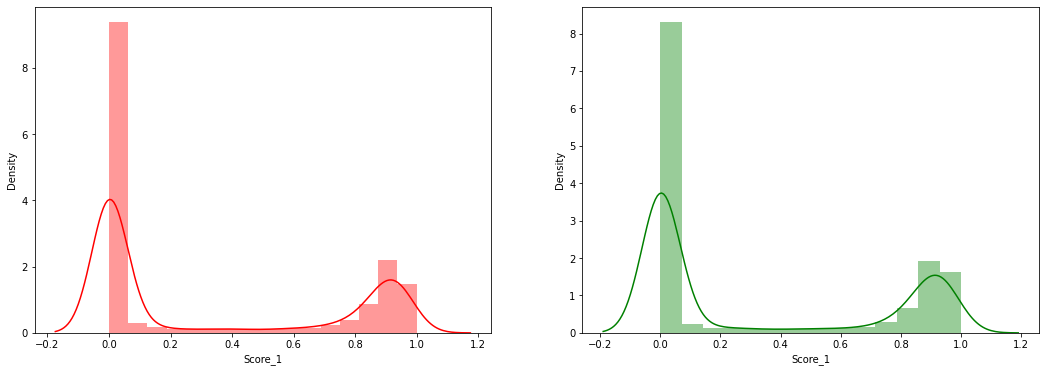

Score_2


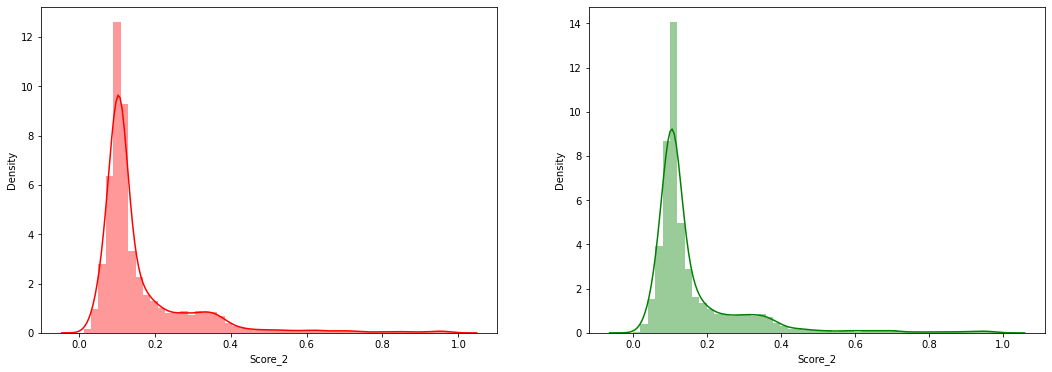

Score_3


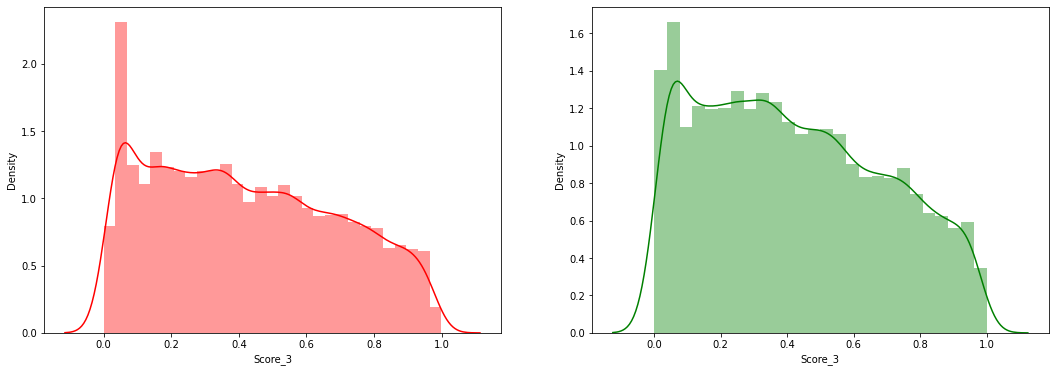

Score_4


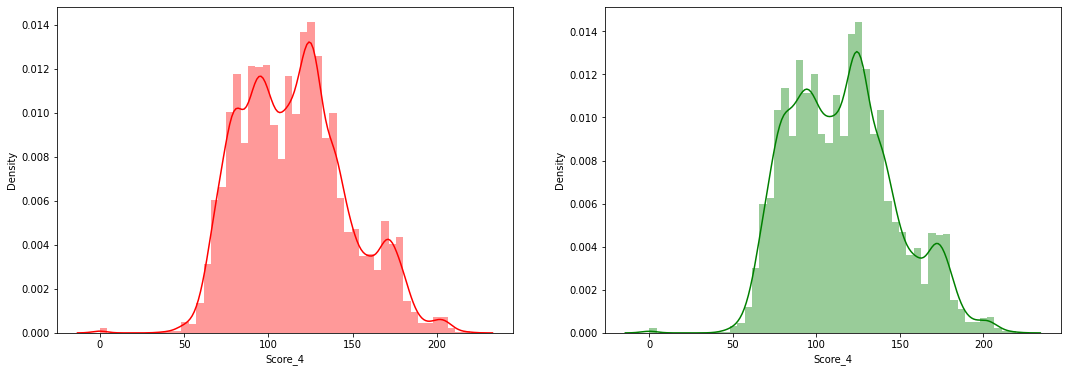

time


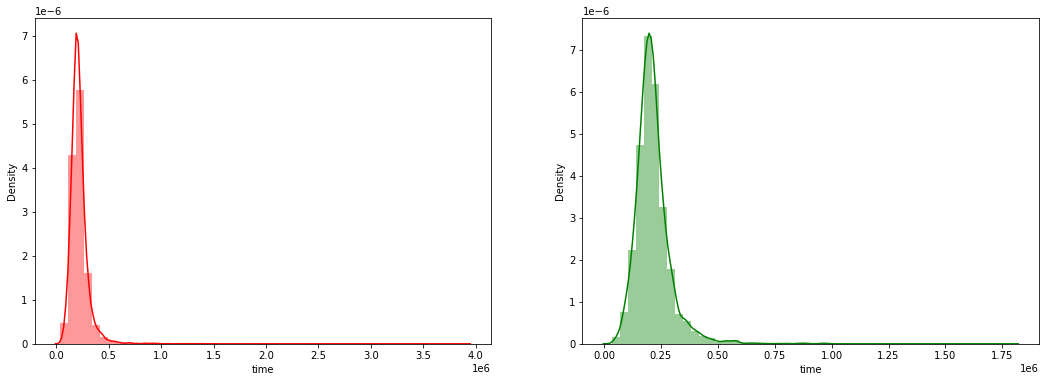

In [13]:
for column in df_t.columns:
  print(column)
  fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
  sns.distplot(df[column],ax=ax[0],color="red")
  sns.distplot(df_t[column],ax=ax[1],color="green")
  plt.show()

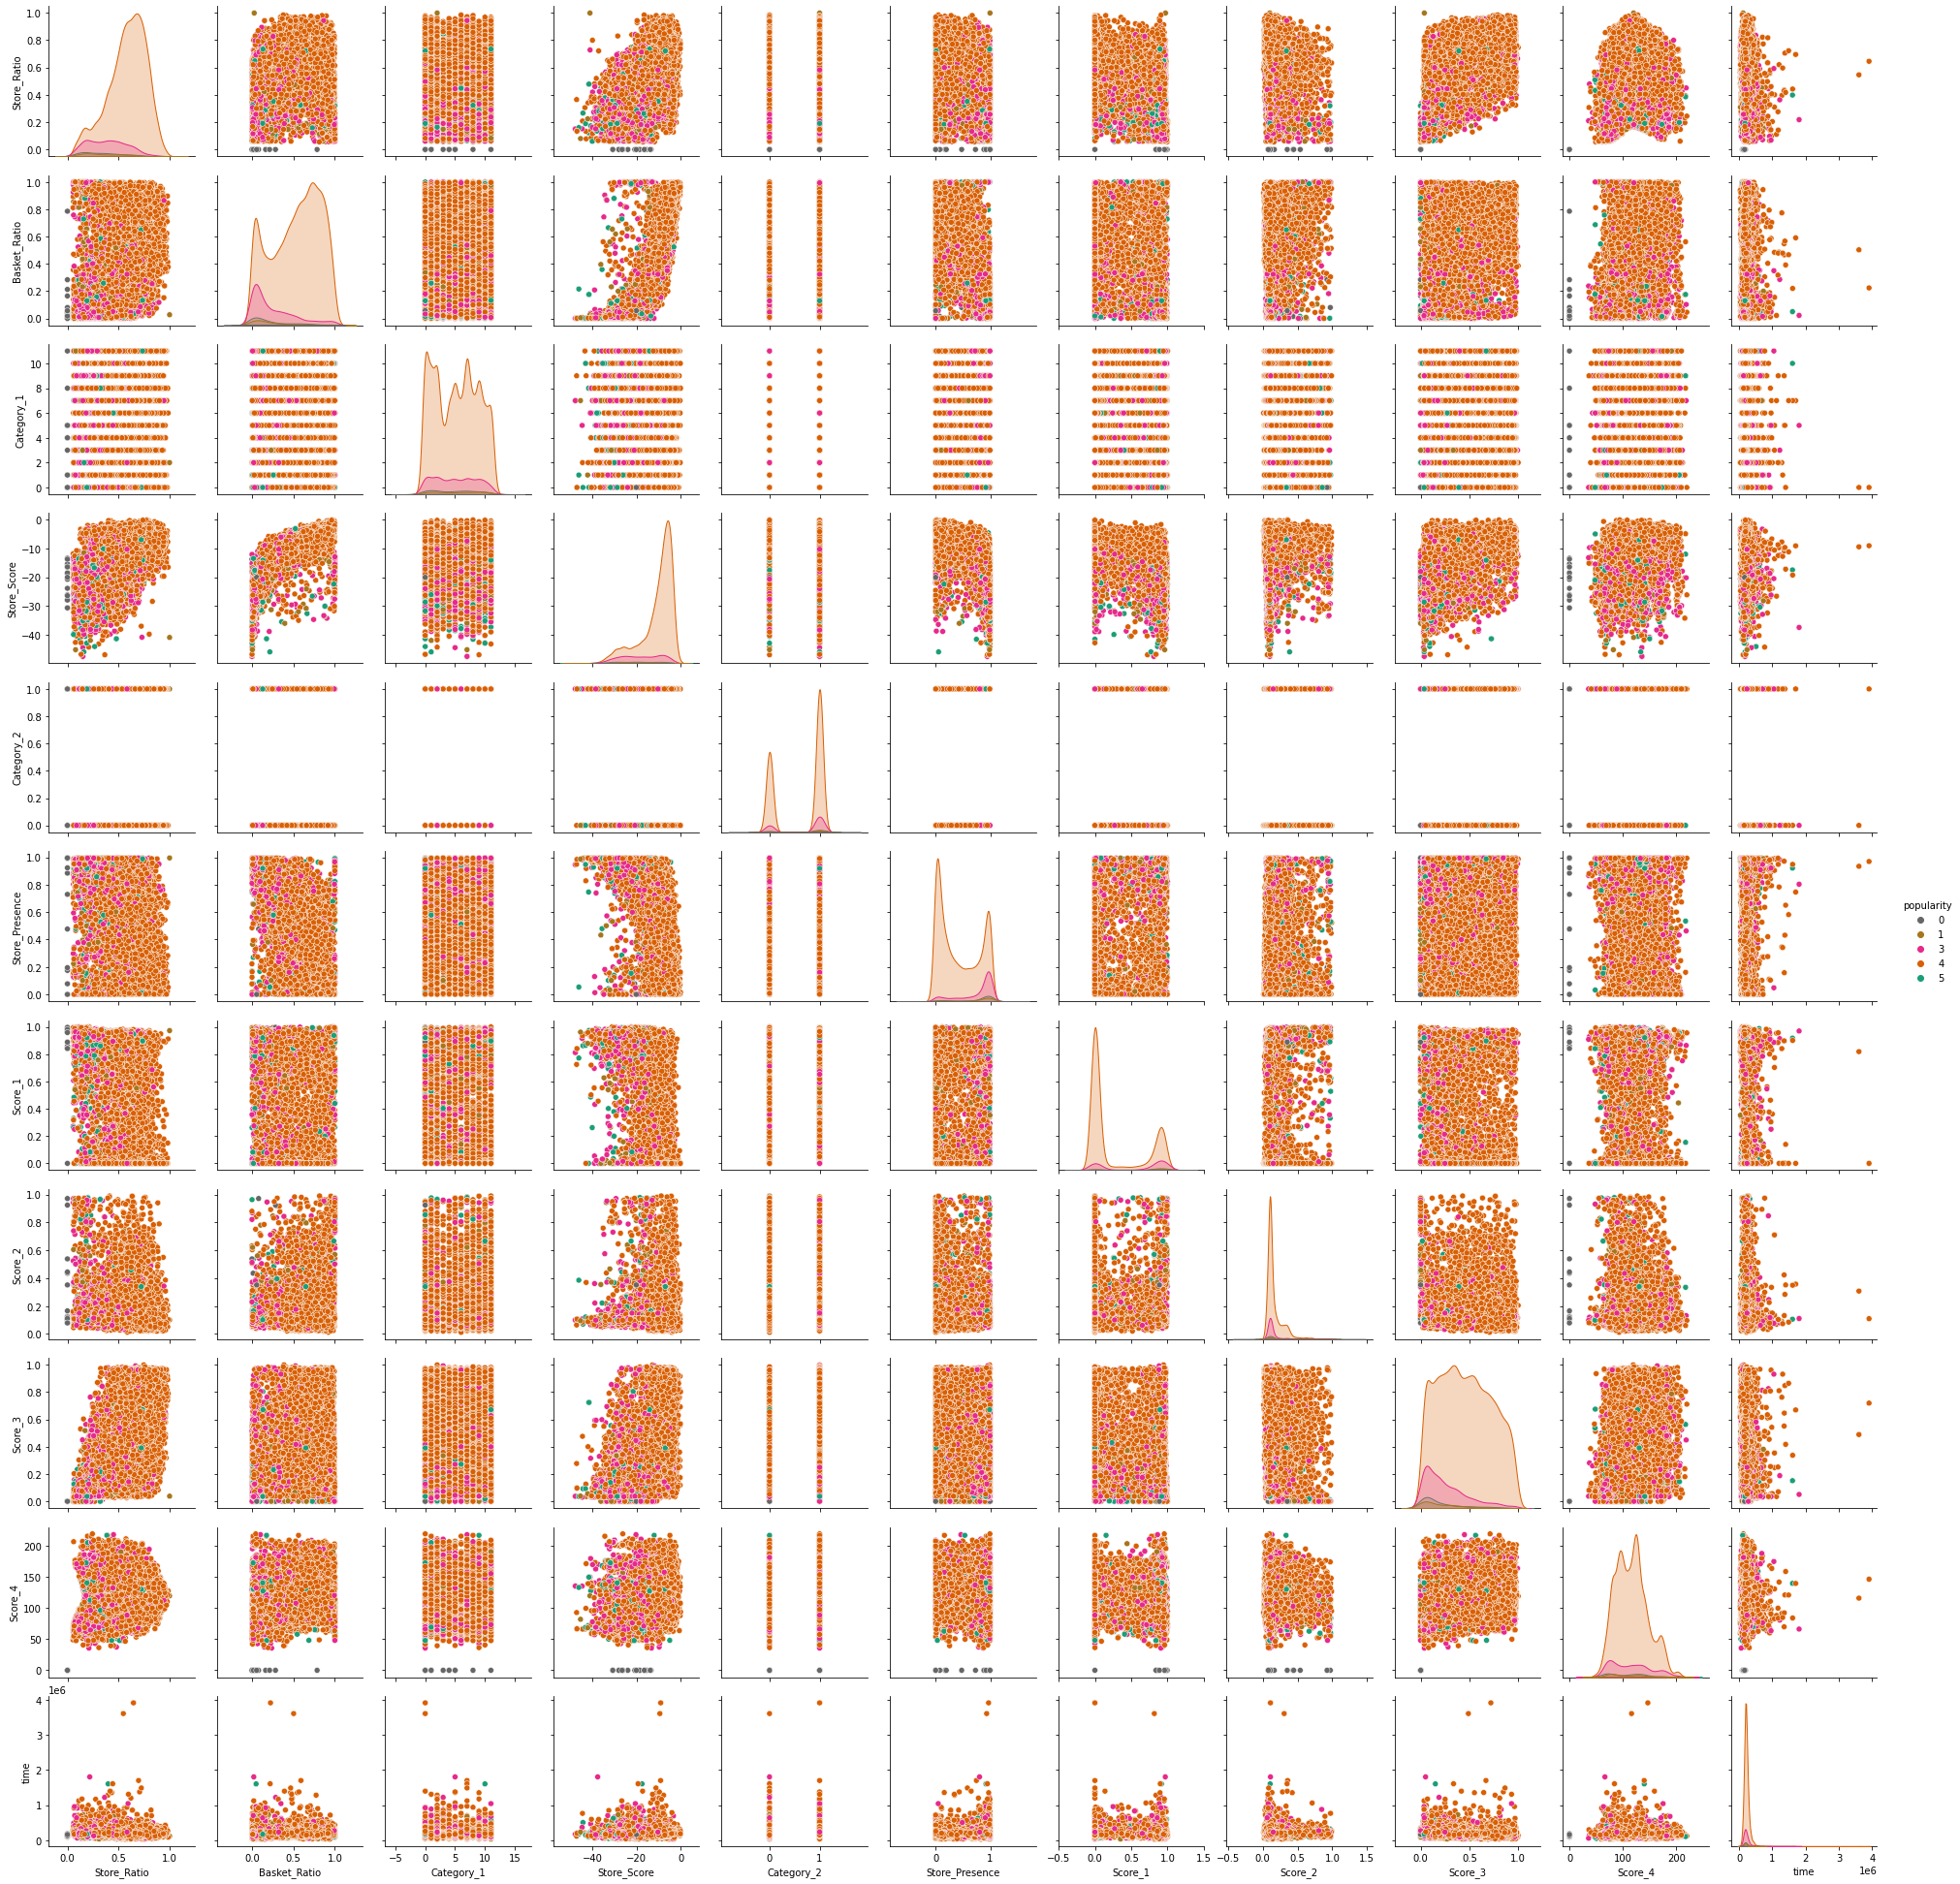

In [ ]:
sns.pairplot(df,hue='popularity',palette='Dark2_r')

In [15]:
#independent and dependent
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=2)

In [17]:
#scale 
from sklearn.preprocessing import StandardScaler
Scaler =StandardScaler()
X_train_scale = Scaler.fit_transform(X_train)
X_test_scale = Scaler.fit_transform(X_test)

In [18]:
print('X_train_len:',X_train_scale.shape)
print('X_test_len:',X_test_scale.shape)
print('y_train_len:',y_train.shape)
print('y_test_len:',y_test.shape)

X_train_len: (12745, 11)
X_test_len: (5463, 11)
y_train_len: (12745,)
y_test_len: (5463,)


In [19]:
y_train.value_counts()

0    10631
2     1545
1      319
3      242
4        8
Name: popularity, dtype: int64

In [20]:
y_train.describe()

count    12745.000000
mean         0.326952
std          0.764204
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: popularity, dtype: float64

In [21]:
y_train

11678    0
2039     0
9034     0
6930     0
10265    0
        ..
14696    0
1099     0
11798    2
6637     0
2575     0
Name: popularity, Length: 12745, dtype: int64

In [22]:
#balancing the dataset
from imblearn.over_sampling import RandomOverSampler
Sampler =RandomOverSampler()
X_bal ,y_bal =Sampler.fit_resample(X_train_scale,y_train)

In [23]:
#import lib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier,AdaBoostClassifier
import xgboost 
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold ,StratifiedKFold
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [24]:
pipe_LR=Pipeline([('scaler1',StandardScaler()),
                 ('LR',LogisticRegression(random_state=2))])
pipe_Ada=Pipeline([('scaler2',StandardScaler()),
                    ('Ada',AdaBoostClassifier(learning_rate=0.1,random_state=2))])
pipe_DT=Pipeline([('scaler3',StandardScaler()),
                  ('DTR',DecisionTreeClassifier())])
pipe_RF=Pipeline([('scaler4',StandardScaler()),
                  ('RFR',RandomForestClassifier())])
pipe_Knn=Pipeline([('scaler5',StandardScaler()),
                   ('Knn',KNeighborsClassifier())])
pipe_Xgb =Pipeline([('scaler5',StandardScaler()),
                   ('Xgboost',XGBClassifier(learning_rate=0.1,random_state=5))])
pipe_Gb =Pipeline([('scaler5',StandardScaler()),
                   ('gb',GradientBoostingClassifier(learning_rate=0.01,random_state=5))])

In [25]:
folds = StratifiedKFold(n_splits=5,shuffle=True ,random_state=42)

In [26]:
pipeline=[pipe_LR,pipe_Ada,pipe_DT,pipe_RF,pipe_Knn,pipe_Xgb,pipe_Gb]

In [27]:
pipe_dict ={0:'Lr',1:'Ada',2:'DT',3:'RF',4:'Knn',5:'Xgb',6:'Gb'}

In [28]:
for pipe in pipeline:
  pipe.fit(X_bal,y_bal)

In [29]:
for i,models in enumerate(pipeline):
  print("{} Accuracy : {}".format(pipe_dict[i],models.score(X_test_scale,y_test)))

Lr Accuracy : 0.6401244737323815
Ada Accuracy : 0.03368112758557569
DT Accuracy : 0.7697235950942706
RF Accuracy : 0.8649093904448105
Knn Accuracy : 0.7177375068643602
Xgb Accuracy : 0.6359143327841845
Gb Accuracy : 0.6198059674171701


In [45]:
model_Rt=RandomForestClassifier()
model_Rt.fit(X_train_scale,y_train)
y_pred=model_Rt.predict(X_test_scale)

In [47]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))

Accuracy_Score : 0.85667215815486


In [31]:
from sklearn.preprocessing import LabelBinarizer
lb =LabelBinarizer()

In [41]:
y_pd =lb.fit_transform(y_pred)
y_t =lb.fit_transform(y_test)

In [44]:
y_pd

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

In [43]:
from sklearn import metrics
print('Log_loss :',metrics.log_loss(y_t,y_pd))

Log_loss : 4.956690590080543


In [ ]:
#hyper tuning Random forest

In [36]:
model_Rt =RandomForestClassifier()

In [37]:
sorted(model_Rt.get_params())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [38]:
params ={
    'criterion':['gini','entropy'],
    'n_estimators':[int(x) for x in np.linspace(start=100 ,stop=1000,num=10)],
    'max_depth':[int(x) for x in np.linspace(10,1000,10)],
    'max_features':['auto','sqrt','log2'],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4,6,8],
}

In [39]:
from sklearn.metrics import log_loss,make_scorer

In [48]:
rf =RandomizedSearchCV(estimator=model_Rt,param_distributions=params,n_iter=5,n_jobs=-1,cv=folds,verbose=11,random_state=10)

In [49]:
sorted(rf.get_params())

['cv',
 'error_score',
 'estimator',
 'estimator__bootstrap',
 'estimator__ccp_alpha',
 'estimator__class_weight',
 'estimator__criterion',
 'estimator__max_depth',
 'estimator__max_features',
 'estimator__max_leaf_nodes',
 'estimator__max_samples',
 'estimator__min_impurity_decrease',
 'estimator__min_impurity_split',
 'estimator__min_samples_leaf',
 'estimator__min_samples_split',
 'estimator__min_weight_fraction_leaf',
 'estimator__n_estimators',
 'estimator__n_jobs',
 'estimator__oob_score',
 'estimator__random_state',
 'estimator__verbose',
 'estimator__warm_start',
 'iid',
 'n_iter',
 'n_jobs',
 'param_distributions',
 'pre_dispatch',
 'random_state',
 'refit',
 'return_train_score',
 'scoring',
 'verbose']

In [50]:
rf.fit(X_bal,y_bal)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  7

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split...
                   pa

In [51]:
rf.best_params_

{'criterion': 'gini',
 'max_depth': 230,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [52]:
best =rf.best_estimator_
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=230, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
model_Rt =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=230, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
model_Rt.fit(X_bal,y_bal)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=230, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
df_t.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0,0.12400,0.99100,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,1,0.00208,0.32200,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,-7.591,1,0.40400,0.00931,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,-9.832,1,0.03000,0.22100,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,-10.791,0,0.08430,0.00765,0.0521,0.96300,131.715,288293


In [59]:
df_t =Scaler.fit_transform(df_t)

In [63]:
prdection= model_Rt.predict(df_t)

In [64]:
prdection

array([2, 0, 0, ..., 0, 0, 2])

In [65]:
len(prdection)

12140

In [66]:
from sklearn.preprocessing import LabelBinarizer
dense =LabelBinarizer()
y_d =dense.fit_transform(prdection)

In [67]:
y_d

array([[0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [68]:
Submit =pd.DataFrame(data=y_d,columns=['0','1','3','4','5'])

In [69]:
Submit

,0,1,3,4,5
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
12135,0,0,1,0,0
12136,1,0,0,0,0
12137,1,0,0,0,0
12138,1,0,0,0,0


In [70]:
Submit.value_counts()

0  1  3  4  5
1  0  0  0  0    9993
0  0  1  0  0    1944
      0  1  0     102
   1  0  0  0      90
   0  0  0  1      11
dtype: int64

In [71]:
Submit.to_csv('Submission.csv')